---
# <span style='color:#2a54b2;font-family:Verdana'><center><b>3. CDC - Inquietante Hallazgo
---

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Algo decepcionados por la baja calidad de los datos que encontramos en España, partimos rumbo a Estados Unidos, con la esperanza de encontrar algo mejor. Y lo cierto es que así ha sido.<br>
El dataset que analizaremos en este notebook discrimina por causa de muerte, lo que nos permitirá poner el foco en algunas de las dolencias que se están asociando a la vacunación de la COVID-19, aunque la gran mayoría de ellas no están especificadas.<br><br>
Por otra parte, este dataset no discrimina por rango de edad (pero ya llegaremos a eso), y no dispone de una estadística de muertes esperadas, que nos ha sido muy útil al analizar el dataset del MoMo, pero sin embargo nos deparará grandes sorpresas.<br>
Sin duda, éste notebok y el siguiente son los más importantes del proyecto, y los más sorprendentes. De momento, puedo adelantar que aquí no he encontrado lo que esperaba encontrar, pero he dado con algo mucho más inquietante, que desde luego no imaginaba...

---
En este notebook voy a utilizar el dataset **Weekly Provisional Counts of Deaths by State and Select Causes, 2020-2021**, que puede descargarse desde el siguiente enlace:  
https://data.cdc.gov/NCHS/Weekly-Provisional-Counts-of-Deaths-by-State-and-S/muzy-jte6

<img src="input/logos/cdc_logo.jpeg" width=350 height=350 />

Detalle de las columnas que voy a utilizar (con los nombres que tendrán una vez renombradas, ya que los nombres originales son muy largos):
- **Jurisdiction** - Especifica si el ámbito es nacional o estatal.
- **Year** - Año del fallecimiento.
- **Week** - Semana del fallecimiento.
- **All_Cause** - Número de defunciones por todas las causas.
- **Natural_Cause** - Número de defunciones por causas naturales.
- **Septicemia** - Número de defunciones por Septicemia.
- **Malignant_Neoplasms** - Número de defunciones por Cancer.
- **Diabetes_Mellitus** - Número de defunciones por Diabetes Mellitus.
- **Alzheimer** - Número de defunciones por Alzheimer.
- **Influenza_Pneumonia** - Número de defunciones por Gripe y Neumonía.
- **Lower_Resp_Diseases** - Número de defunciones por Enfermedades Respiratorias crónicas.
- **Other_Resp_Diseases** - Número de defunciones por otras Enfermedades Respiratorias.
- **Nephritis_Nephrosis** - Número de defunciones por Nefritis, Síndrome Nefrótico y Nefrosis.
- **Abnormal_Symptoms** - Número de defunciones por Síntomas, Signos y Hallazgos Clínicos Anormales, no clasificados.
- **Heart_Diseases** - Número de defunciones por Ataques al Corazón.
- **Cerebrovascular_Diseases** - Número de defunciones por Enfermedades Cerebrovasculares.
- **COVID-19_Multiple** - Número de defunciones por COVID-19, como causa múltiple.
- **COVID-19_Underlying** - Número de defunciones por COVID-19, como causa subyacente.
---

In [1]:
# Importo las librerías que voy a utilizar:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sbrn
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
# Deshabilito el "chained_assignment", para que no devuelva warnings en algunas modificaciones de columnas:
pandas.set_option('chained_assignment', None)

Importo el archivo CSV:

In [3]:
cdc_df = pandas.read_csv('./input/CDC/Weekly_Provisional_Counts_of_Deaths_by_State_and_Select_Causes__2020-2021.csv')

cdc_df

,Data As Of,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,12/15/2021,United States,2020,1,2020-01-04,60157,55003,843.0,11568.0,1829.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/15/2021,United States,2020,2,2020-01-11,60723,55748,861.0,11962.0,1940.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/15/2021,United States,2020,3,2020-01-18,59343,54517,829.0,11701.0,1819.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/15/2021,United States,2020,4,2020-01-25,59147,54389,828.0,11880.0,1864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/15/2021,United States,2020,5,2020-02-01,58806,53990,811.0,11962.0,1828.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,12/15/2021,Puerto Rico,2021,44,2021-11-06,606,563,14.0,95.0,48.0,...,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,Suppressed (counts 1-9),Suppressed (counts 1-9)
5450,12/15/2021,Puerto Rico,2021,45,2021-11-13,584,549,NaN,112.0,62.0,...,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9)
5451,12/15/2021,Puerto Rico,2021,46,2021-11-20,554,513,NaN,90.0,59.0,...,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,Suppressed (counts 1-9),Suppressed (counts 1-9)
5452,12/15/2021,Puerto Rico,2021,47,2021-11-27,429,390,NaN,62.0,54.0,...,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,Suppressed (counts 1-9),Suppressed (counts 1-9)


Elimino las columnas que no voy a utilizar, y renombro casi todas las restantes, porque muchos nombres son muy largos, y contienen espacios:

In [4]:
# Elimino las columnas que no voy a utilizar:
cdc_df.drop(['Data As Of','Week Ending Date','flag_allcause','flag_natcause','flag_sept','flag_neopl','flag_diab','flag_alz','flag_inflpn','flag_clrd',
             'flag_otherresp','flag_nephr','flag_otherunk','flag_hd','flag_stroke','flag_cov19mcod','flag_cov19ucod'], axis='columns', inplace=True)

# Renombro casi todas las columnas restantes:
cdc_df.rename(columns={'Jurisdiction of Occurrence':'Jurisdiction', 'MMWR Year':'Year', 'All Cause':'All_Cause', 'Natural Cause':'Natural_Cause', 'MMWR Week':'Week', 'Septicemia (A40-A41)':'Septicemia',
                       'Malignant neoplasms (C00-C97)':'Malignant_Neoplasms', 'Diabetes mellitus (E10-E14)':'Diabetes_Mellitus', 'Alzheimer disease (G30)':'Alzheimer', 'Influenza and pneumonia (J09-J18)':'Influenza_Pneumonia',
                        'Chronic lower respiratory diseases (J40-J47)':'Lower_Resp_Diseases', 'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)':'Other_Resp_Diseases',
                        'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)':'Nephritis_Nephrosis',
                        'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)':'Abnormal_Symptoms',
                        'Diseases of heart (I00-I09,I11,I13,I20-I51)':'Heart_Diseases', 'Cerebrovascular diseases (I60-I69)':'Cerebrovascular_Diseases',
                        'COVID-19 (U071, Multiple Cause of Death)':'COVID-19_Multiple', 'COVID-19 (U071, Underlying Cause of Death)':'COVID-19_Underlying'}, inplace=True)
cdc_df

,Jurisdiction,Year,Week,All_Cause,Natural_Cause,Septicemia,Malignant_Neoplasms,Diabetes_Mellitus,Alzheimer,Influenza_Pneumonia,Lower_Resp_Diseases,Other_Resp_Diseases,Nephritis_Nephrosis,Abnormal_Symptoms,Heart_Diseases,Cerebrovascular_Diseases,COVID-19_Multiple,COVID-19_Underlying
0,United States,2020,1,60157,55003,843.0,11568.0,1829.0,2537.0,1559.0,3501.0,1067.0,1094.0,630.0,14200.0,3109.0,0.0,0.0
1,United States,2020,2,60723,55748,861.0,11962.0,1940.0,2566.0,1528.0,3708.0,1035.0,1092.0,649.0,13910.0,3188.0,1.0,1.0
2,United States,2020,3,59343,54517,829.0,11701.0,1819.0,2491.0,1482.0,3527.0,992.0,1121.0,611.0,13594.0,3256.0,2.0,1.0
3,United States,2020,4,59147,54389,828.0,11880.0,1864.0,2517.0,1488.0,3403.0,979.0,1107.0,634.0,13607.0,3185.0,2.0,1.0
4,United States,2020,5,58806,53990,811.0,11962.0,1828.0,2480.0,1410.0,3313.0,981.0,1074.0,614.0,13460.0,3083.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,Puerto Rico,2021,44,606,563,14.0,95.0,48.0,51.0,14.0,25.0,NaN,26.0,27.0,89.0,28.0,NaN,NaN
5450,Puerto Rico,2021,45,584,549,NaN,112.0,62.0,52.0,NaN,23.0,NaN,24.0,20.0,83.0,26.0,10.0,NaN
5451,Puerto Rico,2021,46,554,513,NaN,90.0,59.0,45.0,11.0,15.0,NaN,23.0,22.0,90.0,13.0,NaN,NaN
5452,Puerto Rico,2021,47,429,390,NaN,62.0,54.0,32.0,10.0,11.0,NaN,20.0,13.0,61.0,11.0,NaN,NaN


Compruebo los **tipos de datos**:

In [5]:
cdc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Jurisdiction              5454 non-null   object 
 1   Year                      5454 non-null   int64  
 2   Week                      5454 non-null   int64  
 3   All_Cause                 5454 non-null   int64  
 4   Natural_Cause             5454 non-null   int64  
 5   Septicemia                3106 non-null   float64
 6   Malignant_Neoplasms       5443 non-null   float64
 7   Diabetes_Mellitus         4268 non-null   float64
 8   Alzheimer                 4549 non-null   float64
 9   Influenza_Pneumonia       3215 non-null   float64
 10  Lower_Resp_Diseases       4659 non-null   float64
 11  Other_Resp_Diseases       3199 non-null   float64
 12  Nephritis_Nephrosis       3413 non-null   float64
 13  Abnormal_Symptoms         3229 non-null   float64
 14  Heart_Di

Compruebo que no hay **valores null** en los registros correspondientes a todo el pais:

In [6]:
cdc_df.query("Jurisdiction == 'United States'").isna().sum()

Jurisdiction                0
Year                        0
Week                        0
All_Cause                   0
Natural_Cause               0
Septicemia                  0
Malignant_Neoplasms         0
Diabetes_Mellitus           0
Alzheimer                   0
Influenza_Pneumonia         0
Lower_Resp_Diseases         0
Other_Resp_Diseases         0
Nephritis_Nephrosis         0
Abnormal_Symptoms           0
Heart_Diseases              0
Cerebrovascular_Diseases    0
COVID-19_Multiple           0
COVID-19_Underlying         0
dtype: int64

Creo un nuevo dataframe, solo con los registros de **ámbito nacional**:

In [7]:
cdc_country = cdc_df.query("Jurisdiction == 'United States'")

cdc_country

,Jurisdiction,Year,Week,All_Cause,Natural_Cause,Septicemia,Malignant_Neoplasms,Diabetes_Mellitus,Alzheimer,Influenza_Pneumonia,Lower_Resp_Diseases,Other_Resp_Diseases,Nephritis_Nephrosis,Abnormal_Symptoms,Heart_Diseases,Cerebrovascular_Diseases,COVID-19_Multiple,COVID-19_Underlying
0,United States,2020,1,60157,55003,843.0,11568.0,1829.0,2537.0,1559.0,3501.0,1067.0,1094.0,630.0,14200.0,3109.0,0.0,0.0
1,United States,2020,2,60723,55748,861.0,11962.0,1940.0,2566.0,1528.0,3708.0,1035.0,1092.0,649.0,13910.0,3188.0,1.0,1.0
2,United States,2020,3,59343,54517,829.0,11701.0,1819.0,2491.0,1482.0,3527.0,992.0,1121.0,611.0,13594.0,3256.0,2.0,1.0
3,United States,2020,4,59147,54389,828.0,11880.0,1864.0,2517.0,1488.0,3403.0,979.0,1107.0,634.0,13607.0,3185.0,2.0,1.0
4,United States,2020,5,58806,53990,811.0,11962.0,1828.0,2480.0,1410.0,3313.0,981.0,1074.0,614.0,13460.0,3083.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,United States,2021,44,61556,57984,731.0,10988.0,1767.0,2203.0,828.0,2634.0,871.0,990.0,3522.0,11892.0,2998.0,6779.0,6073.0
97,United States,2021,45,60820,57730,736.0,10945.0,1727.0,2316.0,730.0,2499.0,872.0,962.0,3507.0,11878.0,2984.0,6604.0,5976.0
98,United States,2021,46,56778,54072,668.0,10301.0,1560.0,2147.0,741.0,2364.0,790.0,905.0,3271.0,11146.0,2799.0,6290.0,5636.0
99,United States,2021,47,50229,48306,620.0,9131.0,1318.0,1994.0,642.0,2136.0,703.0,746.0,3096.0,9929.0,2517.0,5914.0,5341.0


Hago una agrupación en base a la columna **Year** (con la función **sum**), para comprobar la cantidad de muertes por año, en cada causa de fallecimiento:

In [8]:
cdc_country.groupby(['Year']).sum()

,Week,All_Cause,Natural_Cause,Septicemia,Malignant_Neoplasms,Diabetes_Mellitus,Alzheimer,Influenza_Pneumonia,Lower_Resp_Diseases,Other_Resp_Diseases,Nephritis_Nephrosis,Abnormal_Symptoms,Heart_Diseases,Cerebrovascular_Diseases,COVID-19_Multiple,COVID-19_Underlying
Year,,,,,,,,,,,,,,,,
2020,1431,3438932,3149881,40721.0,611269.0,103787.0,136278.0,54513.0,155100.0,45851.0,53391.0,33773.0,708520.0,162745.0,392495.0,358072.0
2021,1176,3062904,2815058,36221.0,541611.0,89700.0,106368.0,36080.0,125053.0,40558.0,47918.0,71590.0,607252.0,144454.0,402982.0,363287.0


<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Aquí vemos dos cosas muy extrañas.<br>
La cantidad de muertes relacionadas con la COVID-19 es muy similar en los años 2020 y 2021, y eso no debería ser así, debido a la masiva vacunación.<br>
Y lo más inquietante: en 2021 hay más del doble de muertes relacionadas con la causa de fallecimiento más macabra del dataset (literalmente, "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified"). O yo tengo mucha imaginación, o este hallazgo es terrorífico.

Hago una agrupación en base a las columnas **Year** y **Week** (con la función **sum**), para comprobar la cantidad de muertes por año y semana, en cada causa de fallecimiento (hago la agrupación en dos comandos, para poder mostrar todos los valores de cada año):

In [9]:
cdc_country.query("Year == 2020").groupby(['Year','Week']).sum().head(60)

All_Cause  Natural_Cause  Septicemia  Malignant_Neoplasms  \
Year Week                                                              
2020 1         60157          55003       843.0              11568.0   
     2         60723          55748       861.0              11962.0   
     3         59343          54517       829.0              11701.0   
     4         59147          54389       828.0              11880.0   
     5         58806          53990       811.0              11962.0   
     6         59447          54397       806.0              11702.0   
     7         58791          53960       792.0              11804.0   
     8         58899          53983       779.0              11780.0   
     9         59306          54302       813.0              11790.0   
     10        59697          54395       810.0              11710.0   
     11        58650          53519       756.0              11568.0   
     12        59205          54295       840.0              11732.0   
     13        63000          58224       847.0              11782.0   
     14        72262          67424       948.0              11591.0   
     15        79080          73992       833.0              11549.0   
     16        76781          71879       745.0              11209.0   
     17        73882          68728       735.0              11365.0   
     18        69283          63915       738.0              11097.0   
     19        66808          61171       720.0              11014.0   
     20        64448          58967       679.0              11268.0   
     21        61602          56001       713.0              11116.0   
     22        59636          53971       654.0              10901.0   
     23        58875          52915       729.0              11081.0   
     24        58011          52274       693.0              11130.0   
     25        57968          52198       685.0              11158.0   
     26        58491          52636       719.0              11357.0   
     27        59791          53791       682.0              11298.0   
     28        61932          55851       764.0              11332.0   
     29        63140          57128       708.0              11371.0   
     30        64221          58377       684.0              11554.0   
     31        64208          58267       689.0              11513.0   
     32        63680          57815       784.0              11528.0   
     33        63640          57755       736.0              11705.0   
     34        62531          56590       735.0              11516.0   
     35        61069          55325       726.0              11575.0   
     36        60220          54242       701.0              11374.0   
     37        59626          53936       697.0              11468.0   
     38        59718          54134       744.0              11629.0   
     39        60584          55055       764.0              11861.0   
     40        59764          54097       717.0              11423.0   
     41        61743          55933       757.0              11828.0   
     42        60616          55200       776.0              11319.0   
     43        62145          56834       728.0              11676.0   
     44        63380          58056       699.0              11529.0   
     45        67523          61718       766.0              11806.0   
     46        68776          63209       795.0              11745.0   
     47        71650          66239       818.0              11632.0   
     48        73243          67899       773.0              11395.0   
     49        77370          71960       845.0              11356.0   
     50        81949          76404       836.0              11904.0   
     51        82859          77500       840.0              11780.0   
     52        84312          78705       857.0              11691.0   
     53        86944          81068       894.0              11684.0   

           Diabetes_Mellitus  Alzheimer  Influenza

In [10]:
cdc_country.query("Year == 2021").groupby(['Year','Week']).sum().head(60)

All_Cause  Natural_Cause  Septicemia  Malignant_Neoplasms  \
Year Week                                                              
2021 1         87013          81182       852.0              11333.0   
     2         87366          81628       831.0              11849.0   
     3         83617          78097       840.0              11568.0   
     4         79116          73635       784.0              11678.0   
     5         76457          70639       832.0              11604.0   
     6         71487          65933       833.0              11491.0   
     7         69483          64013       821.0              11415.0   
     8         66709          61013       869.0              11617.0   
     9         63647          57975       789.0              11435.0   
     10        61836          56271       840.0              11412.0   
     11        60315          54494       768.0              11294.0   
     12        60731          55047       740.0              11418.0   
     13        58649          52991       704.0              11093.0   
     14        60919          54777       715.0              11566.0   
     15        59066          53320       683.0              11379.0   
     16        60174          54378       728.0              11566.0   
     17        59737          54087       709.0              11602.0   
     18        58911          53059       700.0              11353.0   
     19        58351          52668       689.0              11530.0   
     20        58616          52717       716.0              11593.0   
     21        57152          51404       728.0              11242.0   
     22        57264          51263       700.0              11467.0   
     23        56800          50691       731.0              11288.0   
     24        57115          51107       725.0              11520.0   
     25        56766          50818       747.0              11484.0   
     26        57237          51198       740.0              11539.0   
     27        56815          50673       767.0              11451.0   
     28        56768          51049       769.0              11513.0   
     29        58004          52237       776.0              11500.0   
     30        59892          54173       761.0              11574.0   
     31        62786          57009       739.0              11615.0   
     32        66014          60514       782.0              11816.0   
     33        68913          63470       749.0              11719.0   
     34        70948          65549       732.0              11604.0   
     35        72011          66729       752.0              11496.0   
     36        71841          66635       798.0              11264.0   
     37        71518          66670       789.0              11555.0   
     38        70181          65519       783.0              11481.0   
     39        68945          64460       831.0              11573.0   
     40        66547          62396       809.0              11387.0   
     41        64476          60571       785.0              11239.0   
     42        63903          60145       825.0              11275.0   
     43        62779          59166       757.0              11242.0   
     44        61556          57984       731.0              10988.0   
     45        60820          57730       736.0              10945.0   
     46        56778          54072       668.0              10301.0   
     47        50229          48306       620.0               9131.0   
     48        36646          35596       448.0               6606.0   

           Diabetes_Mellitus  Alzheimer  Influenza_Pneumonia  \
Year Week                                                      
2021 1                2373.0     2946.0               1027.0   
     2                2468.0     2999.0               1002.0   
     3                2213.0     2934.0                926.0   
     4                2184.0     2650.0                907.0   
     5                2097

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Es complicado analizar los datos así, dada la cantidad de valores, así que mejor los representamos en gráficos.

Hago un gráfico comparativo de **2020** (en rojo) y **2021** (en azul), con la **cantidad de muertes por todas las causas** en cada año:

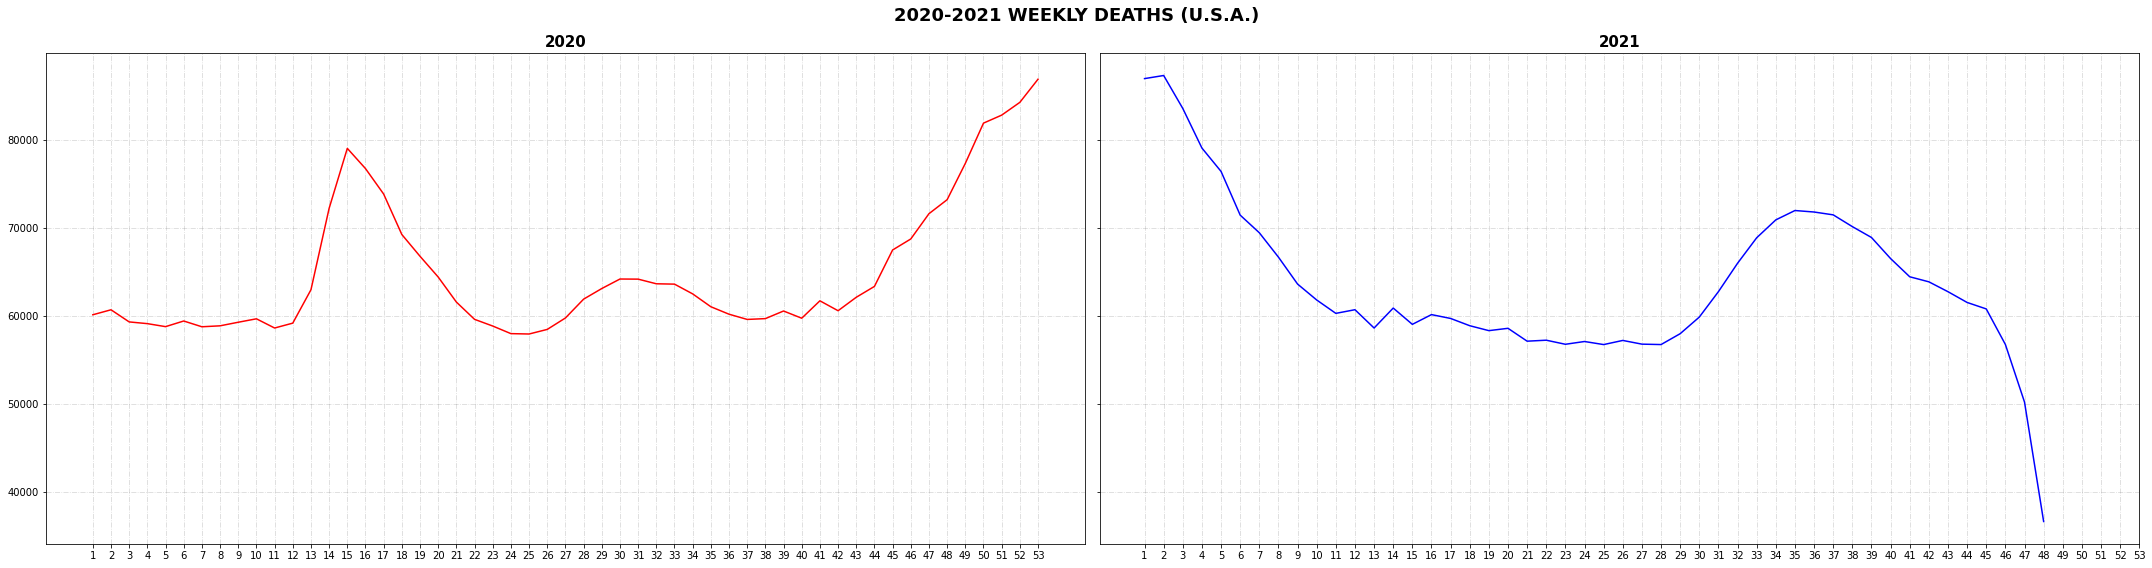

In [11]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(30, 8), sharey=True)

# Defunciones 2020:
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['All_Cause']
ax1.plot(x, y, label='2020', color='red')

# Title, grid, xticks, etc:
ax1.set_title('2020', fontweight='bold', fontsize=15)
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.set_xticks([x for x in range(1, 54)])

# --------------------------------------------------------------------

# Defunciones 2021:
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['All_Cause']
ax2.plot(x, y, label='2021', color='blue')

# Title, grid, xticks, etc:
ax2.set_title('2021', fontweight='bold', fontsize=15)
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.set_xticks([x for x in range(1, 54)])

# --------------------------------------------------------------------

plt.suptitle('2020-2021 WEEKLY DEATHS (U.S.A.)', fontweight='bold', fontsize=18)
plt.tight_layout();

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Vaya, pues al igual que en España, nos encontramos un pico muy llamativo coincidente con el inicio de la vacunación (que en Estados Unidos empezó a finales de 2020), aunque está claro que dicha ola comenzó algo antes. Lo extraño es que es la ola más grande de los 2 años, superando ampliamente al famoso pico de la pandemia.<br>
Vale, no podemos sacar conclusiones definitivas sobre eso, pero raro es.<br>
Y otra coincidencia con España es que hay otro pico muy importante entre julio y octubre de 2021 (cuando toda la población mayor y vulnerable estaba vacunada), pero el de Estados Unidos es mucho más pronunciado. Hemos de decir que en dicho país se comenzó a aplicar la tercera dosis a mediados de agosto (no así en España), lo que quizá pueda darnos una explicación a dicho fenómeno.<br>
¿Conclusión apresurada? Puede ser, pero ya hemos visto varias cosas que no cuadran en los datasets que llevamos analizados hasta ahora...

Hago otro gráfico comparativo de **2020** (en rojo) y **2021** (en azul), con la **cantidad de muertes por todas las causas** en cada año, esta vez superpuesto:

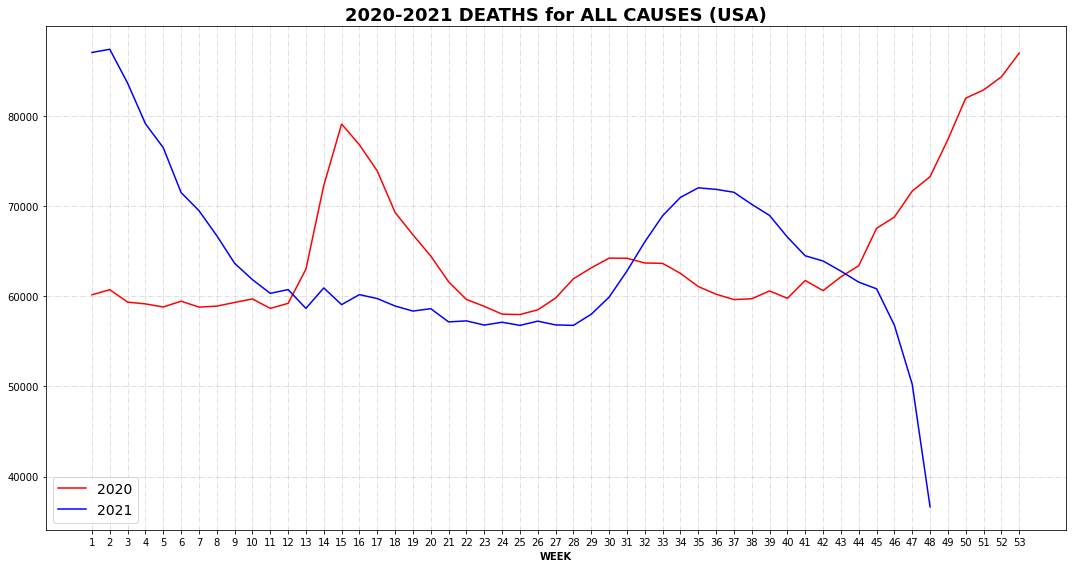

In [12]:
fig = plt.figure(figsize = (15, 8))

# Gráfico 2020:
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['All_Cause']
plt.plot(x, y, label='2020', color='red')

# Gráfico 2021:
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['All_Cause']
plt.plot(x, y, label='2021', color='blue')

plt.title('2020-2021 DEATHS for ALL CAUSES (USA)', fontweight='bold', fontsize=18)
plt.legend(fontsize=14, loc='lower left')
plt.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
plt.xticks([x for x in range(1, 54)])
plt.xlabel('WEEK', fontweight='bold')
plt.tight_layout();

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Sin duda, nos cuesta encontrar una explicación al enorme pico de principios de 2021, pero quizá debemos obviarlo, debido a que en esos meses en 2020 aun no estábamos en pandemia. Podría ser engañoso intentar rascar algo en ese tramo.<br>
Pero, lo que está claro es que el enorme pico de julio a octubre de 2021 (mucho mayor que el de España) no debería estar allí, con toda la población mayor y vulnerable vacunada.<br>
Discriminemos ahora por causas de fallecimiento, a ver que encontramos...

Hago un gráfico comparativo de **2020** (en rojo) y **2021** (en azul), con las **causas de fallecimiento más habituales** del dataset (**COVID19**, como causa múltiple o subyacente, **enfermedades del corazón** y **cáncer**):

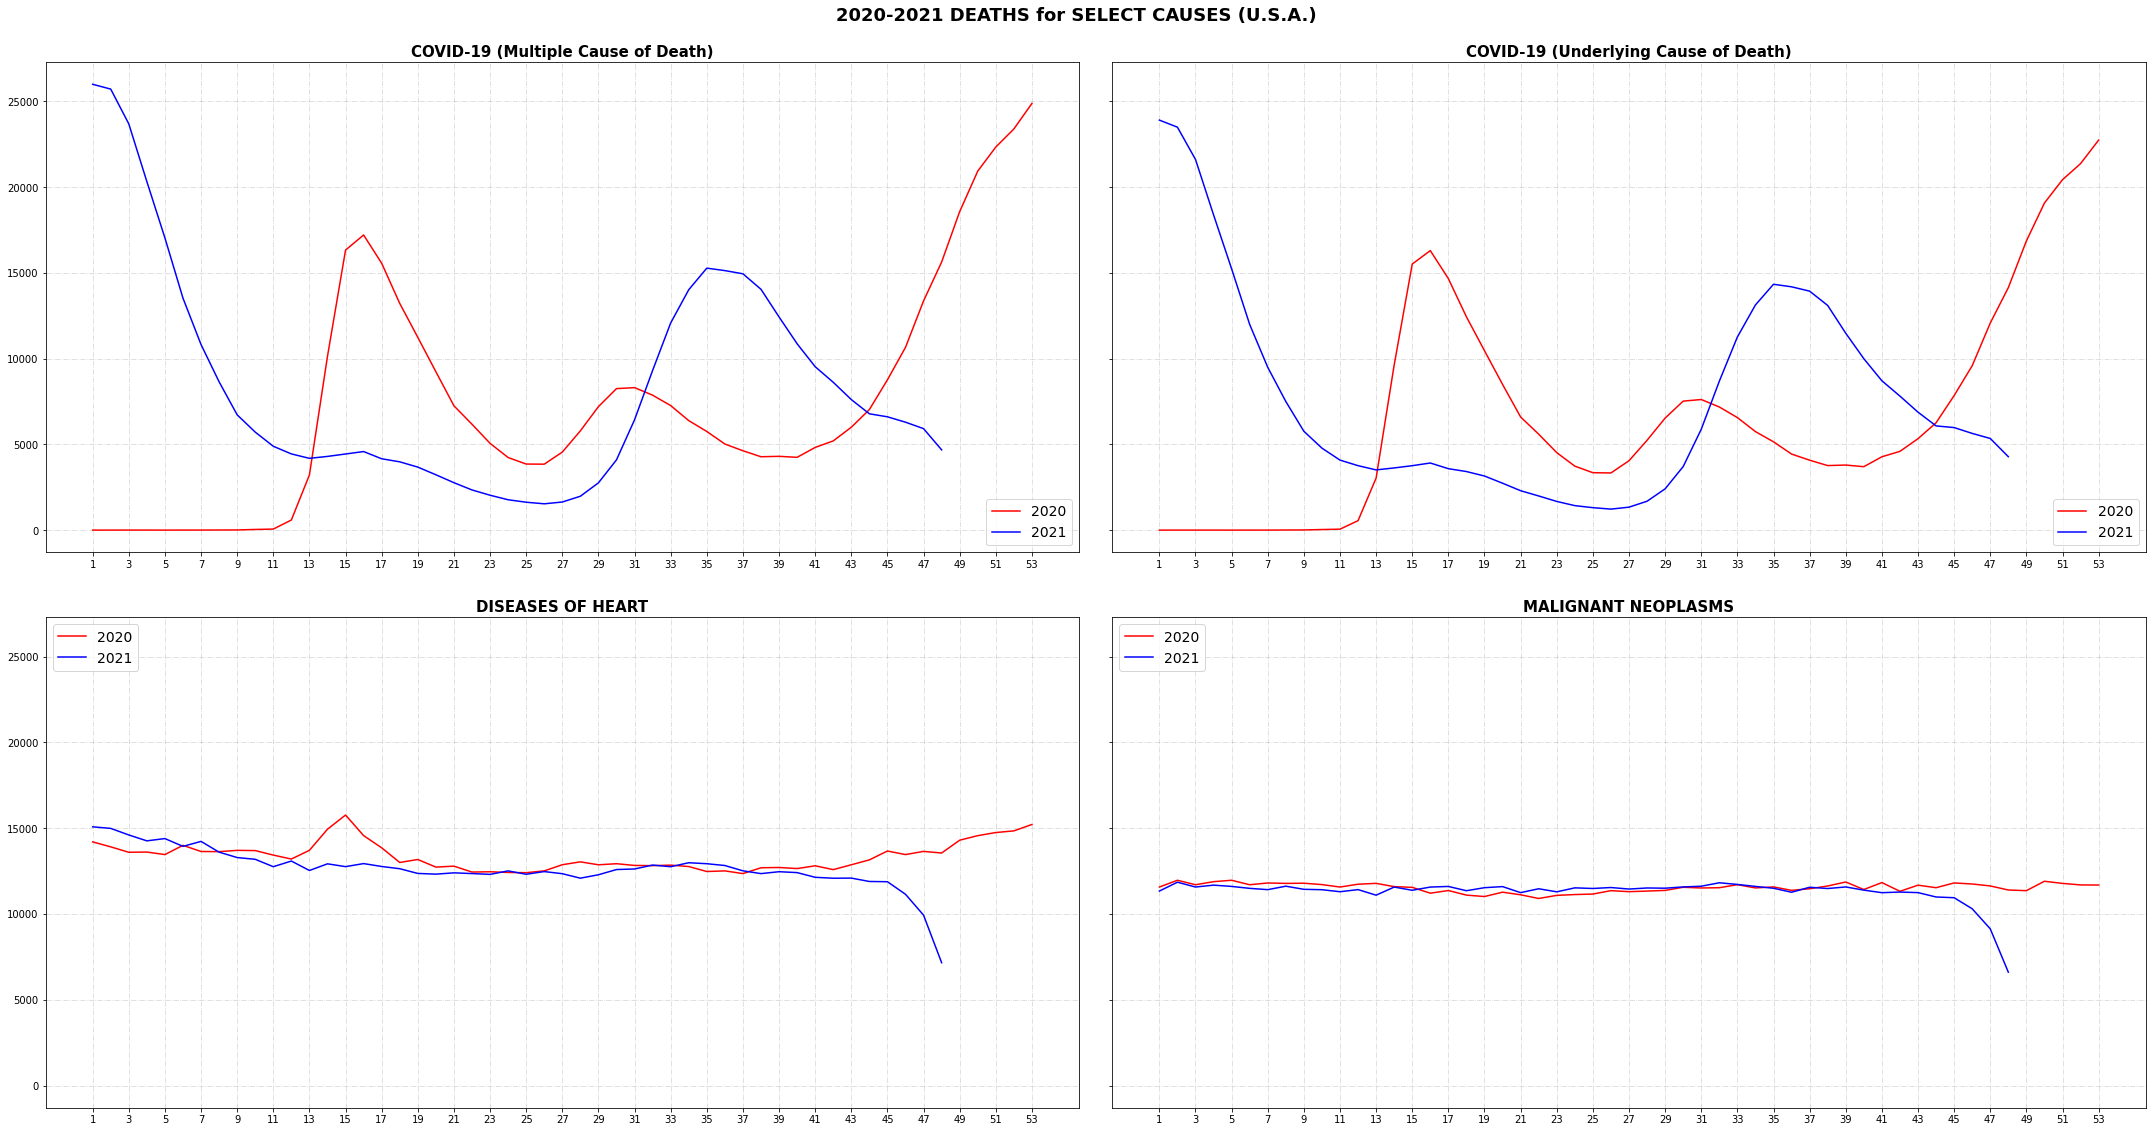

In [13]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30, 16), sharey=True)

# Gráfico 'COVID-19 (Multiple Cause of Death)':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['COVID-19_Multiple']
ax1.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['COVID-19_Multiple']
ax1.plot(x, y, label='2021', color='blue')
# -------------------
ax1.set_title('COVID-19 (Multiple Cause of Death)', fontweight='bold', fontsize=15)
ax1.legend(fontsize=14, loc='lower right')
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'COVID-19 (Underlying Cause of Death)':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['COVID-19_Underlying']
ax2.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['COVID-19_Underlying']
ax2.plot(x, y, label='2021', color='blue')
# -------------------
ax2.set_title('COVID-19 (Underlying Cause of Death)', fontweight='bold', fontsize=15)
ax2.legend(fontsize=14, loc='lower right')
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Diseases of Heart':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Heart_Diseases']
ax3.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Heart_Diseases']
ax3.plot(x, y, label='2021', color='blue')
# -------------------
ax3.set_title('DISEASES OF HEART', fontweight='bold', fontsize=15)
ax3.legend(fontsize=14, loc='upper left')
ax3.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax3.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Malignant Neoplasms':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Malignant_Neoplasms']
ax4.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Malignant_Neoplasms']
ax4.plot(x, y, label='2021', color='blue')
# -------------------
ax4.set_title('MALIGNANT NEOPLASMS', fontweight='bold', fontsize=15)
ax4.legend(fontsize=14, loc='upper left')
ax4.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax4.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

plt.suptitle('2020-2021 DEATHS for SELECT CAUSES (U.S.A.)\n ', fontweight='bold', fontsize=18)
plt.tight_layout(h_pad=3, w_pad=3);

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
No vemos nada reseñable en los fallecimientos por Cáncer, y no demasiado en los fallecimientos por Enfermedades del Corazón (aunque hay un pico modesto, coinicidente con el inicio de la vacunación, que nos llama a analizarlo por rangos de edad).<br>
En cuanto a los fallecimientos relacionados con la COVID-19 (que acapara la mayor cantidad de casos) nos pasa lo mismo que con el gráfico anterior (el de todas las causas): no encontramos explicación al enorme pico de julio a agosto de 2021, salvo que esté relacionado con la vacunación.

Hago un gráfico comparativo de **2020** (en rojo) y **2021** (en azul), con otras **causas de fallecimiento** reflejadas en el dataset (**menos habituales** que las del gráfico anterior):

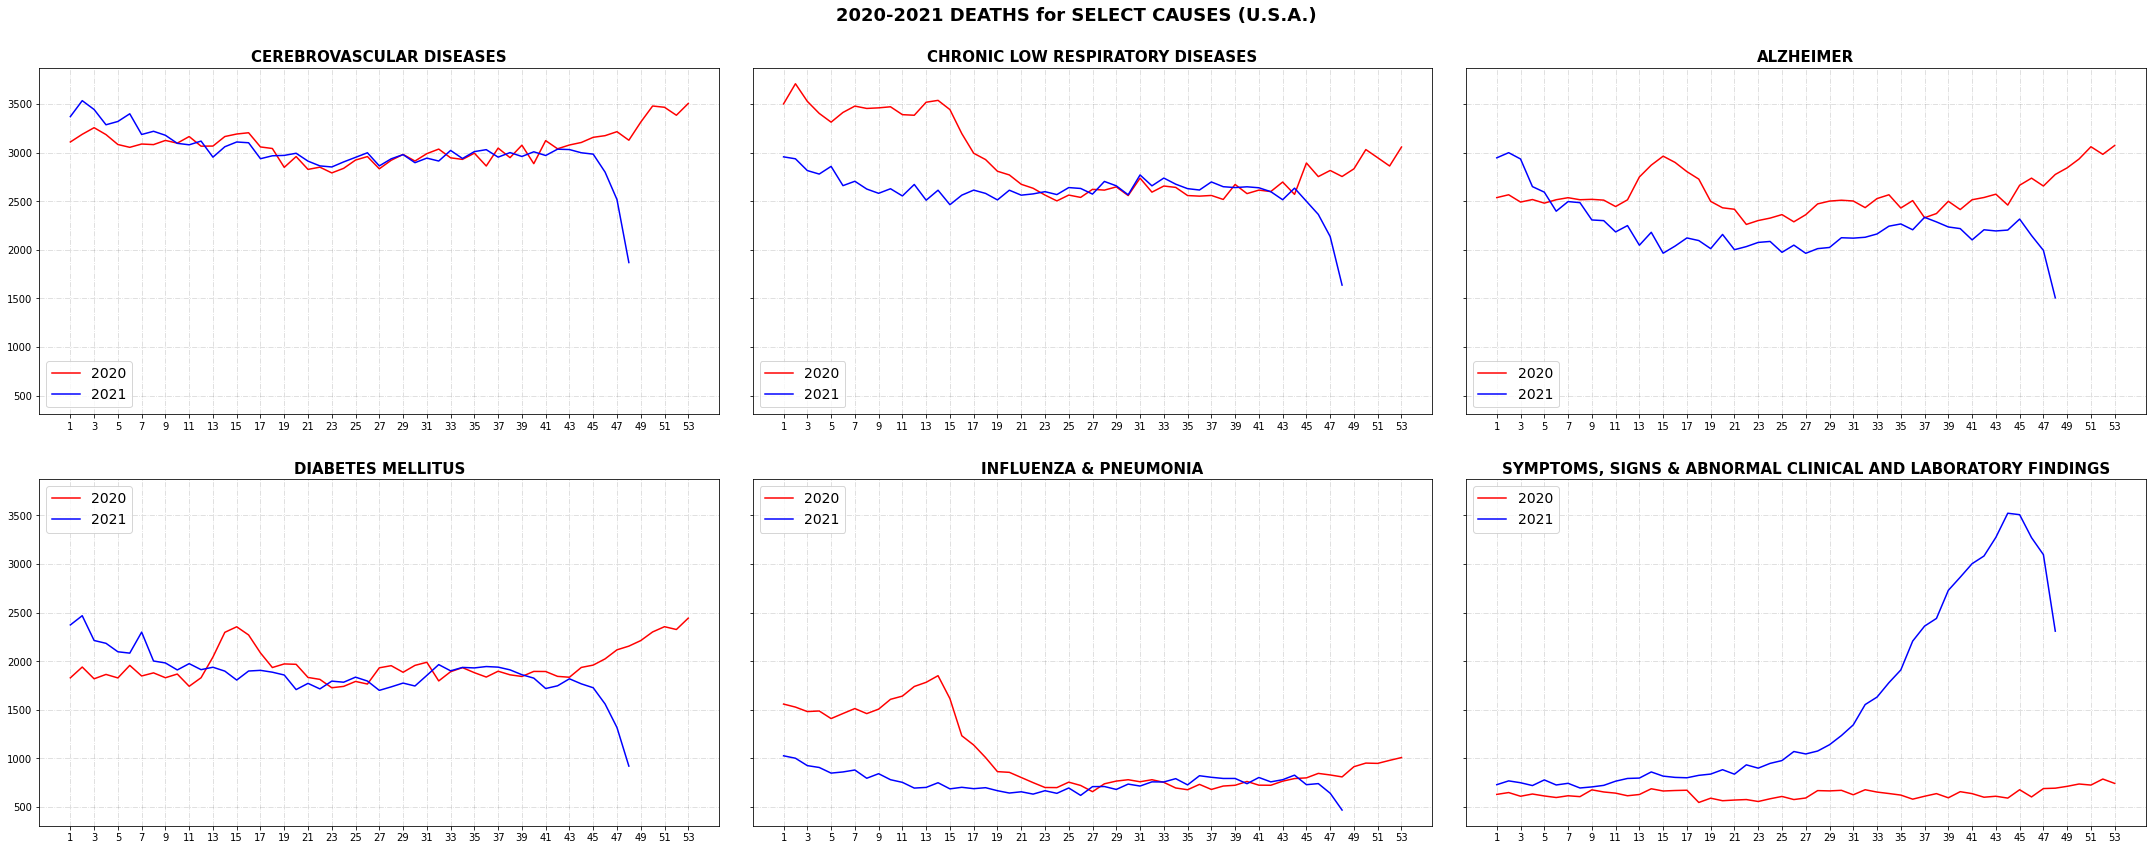

In [14]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(30, 12), sharey=True)

# Gráfico 'Cerebrovascular Diseases':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Cerebrovascular_Diseases']
ax1.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Cerebrovascular_Diseases']
ax1.plot(x, y, label='2021', color='blue')
# -------------------
ax1.set_title('CEREBROVASCULAR DISEASES', fontweight='bold', fontsize=15)
ax1.legend(fontsize=14, loc='lower left')
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Chronic Lower Respiratory Diseases':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Lower_Resp_Diseases']
ax2.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Lower_Resp_Diseases']
ax2.plot(x, y, label='2021', color='blue')
# -------------------
ax2.set_title('CHRONIC LOW RESPIRATORY DISEASES', fontweight='bold', fontsize=15)
ax2.legend(fontsize=14, loc='lower left')
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Alzheimer Disease':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Alzheimer']
ax3.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Alzheimer']
ax3.plot(x, y, label='2021', color='blue')
# -------------------
ax3.set_title('ALZHEIMER', fontweight='bold', fontsize=15)
ax3.legend(fontsize=14, loc='lower left')
ax3.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax3.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Diabetes Mellitus':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Diabetes_Mellitus']
ax4.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Diabetes_Mellitus']
ax4.plot(x, y, label='2021', color='blue')
# -------------------
ax4.set_title('DIABETES MELLITUS', fontweight='bold', fontsize=15)
ax4.legend(fontsize=14, loc='upper left')
ax4.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax4.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Influenza and Pneumonia':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Influenza_Pneumonia']
ax5.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Influenza_Pneumonia']
ax5.plot(x, y, label='2021', color='blue')
# -------------------
ax5.set_title('INFLUENZA & PNEUMONIA', fontweight='bold', fontsize=15)
ax5.legend(fontsize=14, loc='upper left')
ax5.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax5.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

# Gráfico 'Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified':
x = cdc_country.query("Year == 2020")['Week']
y = cdc_country.query("Year == 2020")['Abnormal_Symptoms']
ax6.plot(x, y, label='2020', color='red')
# -------------------
x = cdc_country.query("Year == 2021")['Week']
y = cdc_country.query("Year == 2021")['Abnormal_Symptoms']
ax6.plot(x, y, label='2021', color='blue')
# -------------------
ax6.set_title('SYMPTOMS, SIGNS & ABNORMAL CLINICAL AND LABORATORY FINDINGS', fontweight='bold', fontsize=15)
ax6.legend(fontsize=14, loc='upper left')
ax6.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax6.set_xticks(numpy.arange(1, 54, 2))
# ------------------------------------------------------------------------

plt.suptitle('2020-2021 DEATHS for SELECT CAUSES (U.S.A.)\n ', fontweight='bold', fontsize=18)
plt.tight_layout(h_pad=3, w_pad=3);

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Como en el gráfico anterior, no encontramos nada interesante en la mayoría de las causas de fallecimiento de éste gráfico, aunque los fallecimientos por Enfermedades Cerebrovasculares y por Diabetes Mellitus también tienen un pico coincidente con el inicio de la vacunación (que analizaremos por rangos de edad en el próximo notebook).<br>
Pero la sorpresa nos llega con la causa "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified". Su propia descripción da escalofríos, al menos a mí, y sin decir nada concreto, parece que lo dice todo. Está claro que algo ha pasado en 2021 para que dicha causa de fallecimiento se disparara de esa manera, y a mí solo se me ocurre una explicación.<br>
Demos, pues, un último paso, para ahondar un poco más en los misterios con los que nos hemos topado en este dataset...

---